<a href="https://colab.research.google.com/github/galileo15640215/django/blob/master/imageai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
ｓ
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.21-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [5]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

 AtcoderGetSchedule.gs.desktop	 ICPC	    写真		     旅行
'Colab Notebooks'		 ml_train   大学
 ES				 titanic    富士フイルムインターン


In [7]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True
DATADIR = "drive/ml_train"
classes = ["yamanotesenn", "keihinntouhokusenn", "chuosenn", "soubusenn", "keiyousenn", "toukaidousenn", "yokosukasenn", "700", "N700", "E4", "E5", "E6", "E7"]
names = ["山手線", "京浜東北線", "中央線", "総武線", "京葉線", "東海道線", "横須賀線", "７００", "Ｎ７００", "Ｅ４", "Ｅ５", "Ｅ６", "Ｅ７"]

num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
y_train = []
y_test  = []

cnt = 0
for index, classlabel in enumerate(classes):
    photos_dir = DATADIR + "/" + classlabel
    print(photos_dir)
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        """
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:
              X_train.append(data)
              y_train.append(index)
        cnt += 1
        print(cnt)
        """
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
            cnt += 1
            print(cnt)
        else:
            for angle in range(-20, 20, 5):
                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)
                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                y_train.append(index)
                cnt += 1
                print(cnt)
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./ml_train.npy", xy)

Streaming output truncated to the last 5000 lines.
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import tensorflow.keras as keras
import numpy as np

num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./ml_train.npy", allow_pickle=True)
    # 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    # to_categorical()にてラベルをone hot vector化
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

# データの読み込み
X_train, y_train, X_test, y_test = load_data()

X, y, X_test, y_test = X_train, y_train, X_test, y_test
model = Sequential()

# Xは(1200, 64, 64, 3)
# X.shape[1:]とすることで、(64, 64, 3)となり、入力にすることが可能です。
model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(len(classes)))
model.add(Activation('softmax'))

# https://keras.io/ja/optimizers/
# 今回は、最適化アルゴリズムにRMSpropを利用
#opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)
opt = keras.optimizers.RMSprop(lr=0.00005, decay=1e-6)
# https://keras.io/ja/models/sequential/
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(X, y, batch_size=28, epochs=10)
# HDF5ファイルにKerasのモデルを保存
model.save('./cnn.h5')


Epoch 1/10
712/712 [==============================] - 389s 546ms/step - loss: 1.9669 - accuracy: 0.3327
Epoch 2/10
712/712 [==============================] - 386s 542ms/step - loss: 1.2839 - accuracy: 0.5778
Epoch 3/10
712/712 [==============================] - 387s 544ms/step - loss: 0.9359 - accuracy: 0.6958
Epoch 4/10
712/712 [==============================] - 387s 543ms/step - loss: 0.7210 - accuracy: 0.7679
Epoch 5/10
712/712 [==============================] - 387s 543ms/step - loss: 0.5519 - accuracy: 0.8231
Epoch 6/10
712/712 [==============================] - 388s 545ms/step - loss: 0.4158 - accuracy: 0.8677
Epoch 7/10
712/712 [==============================] - 388s 545ms/step - loss: 0.3150 - accuracy: 0.8990
Epoch 8/10
712/712 [==============================] - 389s 547ms/step - loss: 0.2322 - accuracy: 0.9265
Epoch 9/10
712/712 [==============================] - 389s 546ms/step - loss: 0.1812 - accuracy: 0.9421
Epoch 10/10
712/712 [==============================] - 389s 547m

In [23]:
results.tail(1)

,loss,accuracy
9,0.142408,0.953802


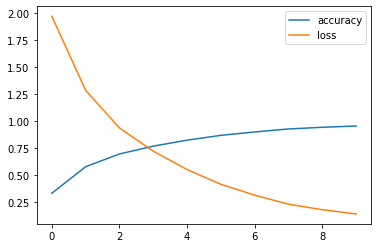

In [24]:
import pandas as pd
results = pd.DataFrame(history.history)
results[['accuracy', 'loss']].plot()


In [18]:
from google.colab import files
uploaded = files.upload()

Saving dennsha1.jpg to dennsha1.jpg


In [19]:
import tensorflow.keras
import sys, os
import numpy as np
from tensorflow.keras.models import load_model

imsize = (64, 64)

testpic     = "./dennsha1.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

if __name__ == "__main__":

    model = load_model(keras_param)
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    #print(prd) # 精度の表示
    for i in range(len(prd[0])):
      print('{:　<8}{:f}'.format(names[i], prd[0][i]))
    prelabel = np.argmax(prd, axis=1)
    for i in range(len(classes)):
      if prelabel == i:
        print(">>>"+names[i])


山手線　　　　　0.000283
京浜東北線　　　0.092020
中央線　　　　　0.000032
総武線　　　　　0.000120
京葉線　　　　　0.000012
東海道線　　　　0.000351
横須賀線　　　　0.000407
７００　　　　　0.000479
Ｎ７００　　　　0.000000
Ｅ４　　　　　　0.008634
Ｅ５　　　　　　0.111510
Ｅ６　　　　　　0.000034
Ｅ７　　　　　　0.786115
>>>Ｅ７
